In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Regression

dependent variable: 
- Contract volume 2020 per company ("Vertragsvolumen") 
New contracts that are starting in the year 2020 
 / Short term and long term contracts

independent variables:
- Number of contracts 2020 per company ("Anzahl")
- Payments 2019 per company ("Zahlungen")
- Company size - micro, small, medium-sized, large ("kategorie") 


In [2]:
a = pd.read_excel('Procurement/Anzahl_Vertragsvolumen.xlsx', sheet_name='Bericht', header=4) 
#skiprows=[2]
#na_values=['unknown'])
#index_col=[0]
#a.tail()
a

,UID,Vertragsvolumen,Anzahl
0,02372680187,882900.00,2
1,411998600,7237.44,1
2,485283180,2361.55,1
3,558238416,923120.00,1
4,80931865200025,21207.90,1
...,...,...,...
13803,NL855819716B01,1506.75,1
13804,REVOGB21,4984.80,1
13805,SCBLZWHXXX,6650.00,1
13806,SE556249683501,60370.92,1


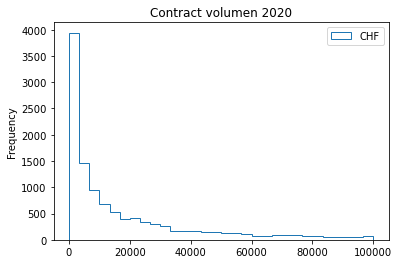

In [60]:
#df_cp4['4th quarter'].plot(bins=30,range=(0,1000), kind='hist',fill=False,histtype='step', title='Contract period: 4th quarter')
#plt.xlabel('Days')
#plt.show

a['Vertragsvolumen'].plot(bins=30,range=(0,100000), kind="hist",fill=False,histtype='step',title='Contract volumen 2020', label="CHF")
plt.legend()

In [9]:
a.describe()

,Vertragsvolumen,Anzahl
count,1.380300e+04,13808.000000
mean,3.506166e+05,9.816194
std,5.704419e+06,71.547775
min,1.000000e-02,1.000000
25%,2.568645e+03,1.000000
50%,1.252954e+04,2.000000
75%,5.738555e+04,5.000000
max,4.149961e+08,3520.000000


In [3]:
b = pd.read_excel('Procurement/SBeZ_2019.xlsx', sheet_name='Bericht', header=13, skiprows=[14]) 
#b = b.astype(np.float32)
b.head()
#print(b.dtypes)

,DUNS,Zahlungen
0,1149657,33.25
1,1649789,4037.17
2,2565428,9487.30
3,3394041,4940.00
4,5109285,9268.20


In [4]:
c = pd.read_excel('Procurement/DUNS_UID.xlsx', sheet_name='Bericht', header=4) 
c1 = c.loc[:,['UID','DUNS']]
c1 = c1.replace(to_replace=['#'], value=np.nan)
#print(c1.dtypes)
#c1.DUNS.dtype
#c1 = pd.to_numeric(c1, downcast='integer')
c1['DUNS'] = c1['DUNS'].apply(pd.to_numeric, downcast='integer', errors='coerce')
#print(c1.dtypes)
c1.head()

,UID,DUNS
0,02372680187,431123206.0
1,411998600,50372072.0
2,485283180,NaN
3,558238416,533671124.0
4,80931865200025,NaN


In [170]:
print(c1.dtypes)

UID      object
DUNS    float64
dtype: object


In [5]:
c2 = c1.merge(b[['DUNS', 'Zahlungen']], on = 'DUNS', how='left')

In [6]:
c3 = c2.merge(a[['UID', 'Vertragsvolumen', 'Anzahl']], on = 'UID', how='right')
c3

,UID,DUNS,Zahlungen,Vertragsvolumen,Anzahl
0,02372680187,431123206.0,1226550.00,882900.00,2
1,411998600,50372072.0,6384.00,7237.44,1
2,485283180,NaN,NaN,2361.55,1
3,558238416,533671124.0,3840964.00,923120.00,1
4,80931865200025,NaN,NaN,21207.90,1
...,...,...,...,...,...
13803,NL855819716B01,NaN,NaN,1506.75,1
13804,REVOGB21,NaN,NaN,4984.80,1
13805,SCBLZWHXXX,NaN,NaN,6650.00,1
13806,SE556249683501,353071623.0,272828.15,60370.92,1


In [7]:
d = pd.read_excel('Procurement/UID_Lieferanten_BVerw OUT.xlsx') 
d

,UID,hauptuid,kategorie
0,CHE100110072,NaN,gelöscht
1,CHE100480735,NaN,gelöscht
2,CHE100814144,NaN,gelöscht
3,CHE100916767,NaN,gelöscht
4,CHE101067645,NaN,gelöscht
...,...,...,...
21679,CHE496890366,CHE100180948,Grossunternehmen
21680,CHE496922026,CHE105835113,Grossunternehmen
21681,CHE499175923,NaN,Grossunternehmen
21682,CHE499644421,NaN,Grossunternehmen


In [8]:
c4 = c3.merge(d[['UID', 'kategorie']], on = 'UID', how='right')
c4

,UID,DUNS,Zahlungen,Vertragsvolumen,Anzahl,kategorie
0,CHE100110072,488140153.0,NaN,91018.70000,2.0,gelöscht
1,CHE100480735,480954833.0,4455.00,10018.51248,8.0,gelöscht
2,CHE100814144,NaN,NaN,NaN,NaN,gelöscht
3,CHE100916767,481331320.0,62216.50,189404.91411,5.0,gelöscht
4,CHE101067645,480409679.0,246.90,223.80060,1.0,gelöscht
...,...,...,...,...,...,...
21679,CHE496890366,483484312.0,NaN,26925.00000,1.0,Grossunternehmen
21680,CHE496922026,480029566.0,39599.00,6034.17252,9.0,Grossunternehmen
21681,CHE499175923,480687722.0,120414.70,100416.45000,1.0,Grossunternehmen
21682,CHE499644421,480205930.0,439214.03,378944.20444,293.0,Grossunternehmen


In [9]:
cleanup_nums = {'kategorie': {'gelöscht':np.nan, 'Mikrounternehmen': 0, 'Kleinunternehmen': 1, 'Mittelunternehmen': 2, 'Grossunternehmen':3}}
c4.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
c4

,UID,DUNS,Zahlungen,Vertragsvolumen,Anzahl,kategorie
0,CHE100110072,488140153.0,NaN,91018.70000,2.0,NaN
1,CHE100480735,480954833.0,4455.00,10018.51248,8.0,NaN
2,CHE100814144,NaN,NaN,NaN,NaN,NaN
3,CHE100916767,481331320.0,62216.50,189404.91411,5.0,NaN
4,CHE101067645,480409679.0,246.90,223.80060,1.0,NaN
...,...,...,...,...,...,...
21679,CHE496890366,483484312.0,NaN,26925.00000,1.0,3
21680,CHE496922026,480029566.0,39599.00,6034.17252,9.0,3
21681,CHE499175923,480687722.0,120414.70,100416.45000,1.0,3
21682,CHE499644421,480205930.0,439214.03,378944.20444,293.0,3


In [10]:
c4['kategorie'] = c4['kategorie'].apply(pd.to_numeric, downcast='integer', errors='coerce')
print(c4.dtypes)

UID                 object
DUNS               float64
Zahlungen          float64
Vertragsvolumen    float64
Anzahl             float64
kategorie          float64
dtype: object


In [25]:
c4.shape
#c4.to_excel('Procurement/output_with_nan.xlsx')

(21684, 6)

In [11]:
c5 = c4.dropna()
c5.shape

(7808, 6)

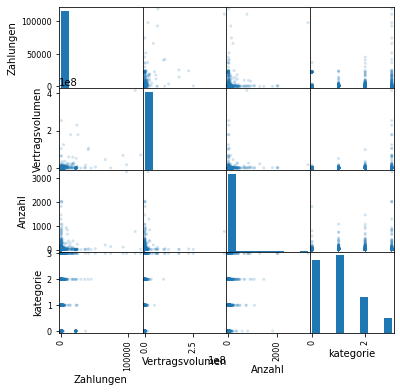

In [59]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(c5[['Zahlungen', 'Vertragsvolumen', 'Anzahl', 'kategorie']], alpha=0.2, figsize=(6, 6), diagonal='hist')
#plt.show()


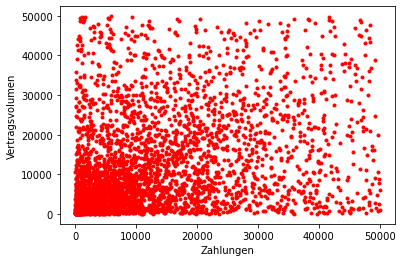

In [218]:
#plt.plot(c7['Zahlungen'], c7['Vertragsvolumen'], '.r')
#plt.xlabel('Zahlungen')
#plt.ylabel('Vertragsvolumen');

In [74]:
c5.describe()

,DUNS,Zahlungen,Vertragsvolumen,Anzahl,kategorie
count,7.808000e+03,7808.000000,7.808000e+03,7808.000000,7808.000000
mean,4.865316e+08,557.886355,5.493617e+05,13.933658,0.968494
std,4.417376e+07,3696.503136,7.534739e+06,77.629654,0.919471
min,1.084066e+08,-4.237260,1.000000e-02,1.000000,0.000000
25%,4.807478e+08,5.635817,4.500000e+03,1.000000,0.000000
50%,4.823649e+08,25.513600,2.136946e+04,3.000000,1.000000
75%,4.850233e+08,123.630825,9.819640e+04,8.000000,2.000000
max,1.000000e+09,118850.217280,4.149961e+08,3252.000000,3.000000


In [13]:
x = c5[['Zahlungen', 'Anzahl', 'kategorie']]
y = c5['Vertragsvolumen']

In [118]:
x.shape

(7808, 3)

In [182]:
y.shape

(7808,)

In [14]:
# Make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

Train MSE = 6746463.32
Test MSE = 6771735.53
Train MAE = 984145.80
Test MAE = 844029.10
Train R2 =  0.23
Test R2 =  0.01


[]

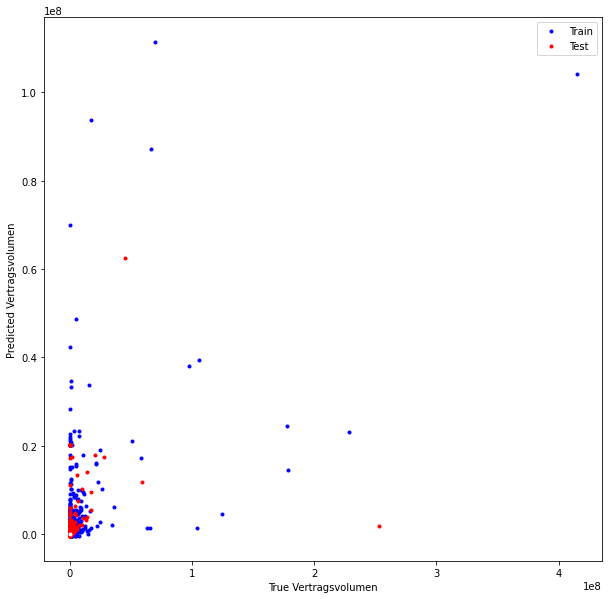

In [15]:
# Evaluate MSE, MAE, and R2 on train and test datasets

# Prediction:
y_p_train = reg.predict(x_train)
y_p_test = reg.predict(x_test)

# mse
print('Train MSE = %5.2f' % np.std(y_train - y_p_train))
print('Test MSE = %5.2f' % np.std(y_test - y_p_test))
# mse
print('Train MAE = %5.2f' % np.mean(np.abs(y_train - y_p_train)))
print('Test MAE = %5.2f' % np.mean(np.abs(y_test - y_p_test)))
# R2
print('Train R2 = %5.2f' % reg.score(x_train, y_train))
print('Test R2 = %5.2f' % reg.score(x_test, y_test))

# Plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train, 'b.', label='Train')
plt.plot(y_test, y_p_test, 'r.', label='Test')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('True Vertragsvolumen')
plt.ylabel('Predicted Vertragsvolumen')
#plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

In [129]:
c5.to_excel('Procurement/c5.xlsx')

Filter the data

In [77]:
c6 = c5[(c5['Vertragsvolumen'] < 50000) & (c5['Vertragsvolumen'] > 0)]
c7 = c6[(c6['Zahlungen'] < 50000) & (c6['Zahlungen'] > 0)]

In [78]:
x = c7[['Zahlungen', 'Anzahl', 'kategorie']]
y = c7['Vertragsvolumen']

In [79]:
x.shape

(4075, 3)

In [215]:
y.shape

(4075,)

In [80]:
# Make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

Train MSE = 10624.11
Test MSE = 10283.10
Train MAE = 7898.37
Test MAE = 7586.37
Train R2 =  0.22
Test R2 =  0.19


[]

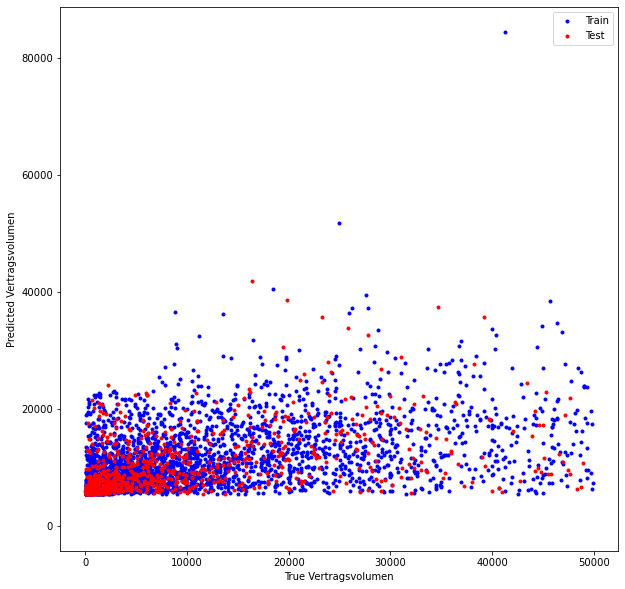

In [81]:
# Evaluate MSE, MAE, and R2 on train and test datasets

# Prediction:
y_p_train = reg.predict(x_train)
y_p_test = reg.predict(x_test)

# mse
print('Train MSE = %5.2f' % np.std(y_train - y_p_train))
print('Test MSE = %5.2f' % np.std(y_test - y_p_test))
# mse
print('Train MAE = %5.2f' % np.mean(np.abs(y_train - y_p_train)))
print('Test MAE = %5.2f' % np.mean(np.abs(y_test - y_p_test)))
# R2
print('Train R2 = %5.2f' % reg.score(x_train, y_train))
print('Test R2 = %5.2f' % reg.score(x_test, y_test))

# Plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train, 'b.', label='Train')
plt.plot(y_test, y_p_test, 'r.', label='Test')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('True Vertragsvolumen')
plt.ylabel('Predicted Vertragsvolumen')
#plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

In [91]:
x1 = c5['Zahlungen']
y1 = c5['Vertragsvolumen']
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
print (p_value)

0.0


In [92]:
x2 = c5['Anzahl']
y2 = c5['Vertragsvolumen']
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
print (p_value)

6.285186319604404e-24


In [94]:
x3 = c5['kategorie']
y3 = c5['Vertragsvolumen']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3, y3)
print (p_value)

6.320597353066842e-22


## Language Detection - work in progress

In [120]:
clanguage = pd.read_excel('Procurement/Verträge_DE_FR.xlsx', sheet_name='Bericht', header=3) 
#skiprows=[2]
#na_values=['unknown'])
#index_col=[0]
#clanguage = str(clanguage['Positionstext Vertrag'])

In [121]:
#Filter by text language
lang = ['1051', '1050']
clanguage = clanguage[clanguage['Buchungskreis'].isin(lang)]
clanguage

,Buchungskreis,Positionstext Vertrag,Anzahl Verträge\n01.01.1000 - 31.12.9999
0,1050,100 roll-up pour protection entre deux b,1
1,1050,3 Licences supplémentaires Kofax Develop,1
2,1050,4 journées d'assessments + options,1
3,1050,5 souscriptions pour Elastic ELK Gold,1
4,1050,Abonnement Enquête en ligne LimeSurvey,1
...,...,...,...
325,1051,Wartung mit Genauigkeitsabnahme Wenzel L,1
326,1051,Werkzeuge,1
327,1051,Werkzeugreinigung und -Kontrolle,1
328,1051,div. Ersatzteile für Studer S33,1


In [122]:
#Create a random train, valid, test split
data_shuffle = clanguage.sample(frac=1)

train = data_shuffle[0:220]
valid = data_shuffle[220:290]
test = data_shuffle[290:321]

In [ ]:
# create and exploring the trigrams

# modelling
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# model evaluation: prediction, accurancy, confusion matrix